#### Kmeans Clustering on Spotify Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv",index_col='year')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
year,,,,,,,,,,,,,,,,,,
1928,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790
1928,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767
1928,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800
1928,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200
1928,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060
2020,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700
2020,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530


In [3]:
ds=df.drop(['artists','name','id','release_date'], axis=1, inplace=True) #drop insignificant cols

In [4]:
from sklearn.preprocessing import StandardScaler #scaling the data

scaler = StandardScaler()
dfs = scaler.fit_transform(df)

In [5]:
pd.DataFrame(dfs).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05,1.699090e+05
mean,-4.244931e-16,-9.148101e-16,7.900086e-17,2.019380e-16,-3.646905e-14,1.968370e-15,5.210349e-16,2.848907e-16,-3.665894e-17,-2.154143e-15,-1.576072e-14,6.934050e-17,-4.125185e-17,-2.942523e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.309559e+00,-3.069086e+00,-1.865276e+00,-1.827274e+00,-3.045204e-01,-5.235128e-01,-1.479418e+00,-1.169090e+00,-8.581591e+00,-1.559227e+00,-1.462135e+00,-6.273153e-01,-3.806053e+00,-2.027749e+00
25%,-1.058647e+00,-6.909209e-01,-4.975715e-01,-8.436884e-01,-3.045204e-01,-5.235128e-01,-9.104679e-01,-6.125159e-01,-5.469999e-01,-1.559227e+00,-9.061306e-01,-3.945507e-01,-7.625910e-01,-8.006465e-01
50%,-3.223294e-03,5.617650e-02,-1.879811e-01,-2.839730e-02,-3.045204e-01,-5.228533e-01,-5.704269e-02,-4.054976e-01,1.581664e-01,6.413435e-01,6.687765e-02,-3.271890e-01,-7.062285e-02,4.536794e-02
75%,1.048218e+00,7.348375e-01,2.600844e-01,8.280324e-01,-3.045204e-01,-2.429045e-01,7.963825e-01,3.185008e-01,7.503932e-01,6.413435e-01,7.618836e-01,-1.244370e-01,6.106706e-01,8.265975e-01
max,1.334974e+00,2.565511e+00,4.263128e+01,1.912594e+00,3.283853e+00,2.709302e+00,1.649808e+00,4.487148e+00,2.686777e+00,6.413435e-01,3.171237e+00,5.835405e+00,4.137847e+00,1.783127e+00


In [6]:
from sklearn.cluster import KMeans

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(dfs)

KMeans(n_clusters=2)

In [7]:
kmeans.inertia_

1948008.491629517

Text(0, 0.5, 'Inertia')

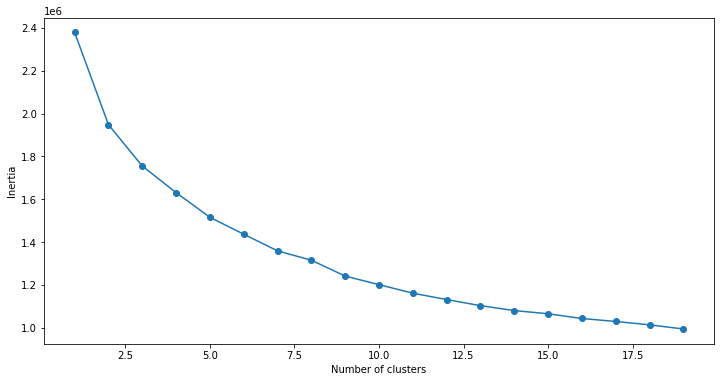

In [8]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++',max_iter = 300)
    kmeans.fit(dfs)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [9]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(dfs)
pred = kmeans.predict(dfs)

In [10]:
frame = pd.DataFrame(dfs)
frame['cluster'] = pred
frame['cluster'].value_counts()


4    71740
2    53549
1    28005
0    12266
3     4349
Name: cluster, dtype: int64

In [ ]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dfs)    
visualizer.poof()   

#### Silhoutte Score is the highest for k=3 